In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. rendering & visiualization

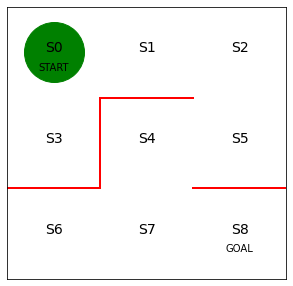

In [102]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

# plt.plot([1, 1], [0, 1], color='red', linewidth=2)
# plt.plot([1, 2], [2, 2], color='red', linewidth=2)
# plt.plot([2, 2], [2, 1], color='red', linewidth=2)
# plt.plot([2, 3], [1, 1], color='red', linewidth=2)

plt.plot([2, 3], [1, 1], color='red', linewidth=2)
plt.plot([0, 1], [1, 1], color='red', linewidth=2)
plt.plot([1, 1], [1, 2], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')
# plt.axis('off')
plt.tick_params(axis='both', which='both', 
                bottom=False, top=False, 
                right=False, left=False,
                labelbottom=False, labelleft=False
               )
line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

## 2. agent action policy

- $\pi_\theta(s,a)$
    - $s: S_0 \rightarrow S_8$, discrete & finite (3*3, grid world)
    - $a: [0, 1, 2, 3]$, $\uparrow, \rightarrow, \downarrow, \leftarrow$
    - representation
        - function：nn
        - table：state*action matrix, 每一行表示概率分布（关于动作选择）

In [103]:
# border & barrier
theta_0 = np.asarray([[np.nan, 1, 1, np.nan],      # s0
                      [np.nan, 1, np.nan, 1],      # s1
                      [np.nan, np.nan, 1, 1],      # s2
                      [1, np.nan, np.nan, np.nan], # s3 
                      [np.nan, 1, 1, np.nan],      # s4
                      [1, np.nan, np.nan, 1],      # s5
                      [np.nan, 1, np.nan, np.nan], # s6 
                      [1, 1, np.nan, 1]]           # s7
                     )

In [108]:
def cvt_theta_0_to_pi(theta):
    m, n = theta.shape
    pi = np.zeros((m, n))
    for r in range(m):
        pi[r, :] = theta[r, :] / np.nansum(theta[r, :])
    return np.nan_to_num(pi)

In [109]:
pi = cvt_theta_0_to_pi(theta_0)

In [110]:
pi

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.5       , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.33333333]])

In [111]:
actions = list(range(4))

In [112]:
actions

[0, 1, 2, 3]

In [113]:
def step(state, action):
    if action == 0:
        state -= 3
    elif action == 1:
        state += 1
    elif action == 2:
        state += 3
    elif action == 3:
        state -= 1
    return state

In [130]:
state = 0
action_history = []
state_history = [state]
while True:
    action = np.random.choice(actions, p=pi[state, :])
    state = step(state, action)
    if state == 8:
        state_history.append(8)
        break
    action_history.append(action)
    state_history.append(state)
len(action_history)

57

In [123]:
state_history

[0, 1, 2, 5, 4, 7, 4, 7]

## 3. rendering & animation

In [124]:
from matplotlib import animation
from IPython.display import HTML

In [131]:
def init():
    line.set_data([], [])
    return (line, )
def animate(i):
    state = state_history[i]
    x = (state % 3)+0.5
    y = 2.5 - int(state/3)
    line.set_data(x, y)

In [132]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

In [128]:
anim.save('maze_0.mp4')

In [133]:
HTML(anim.to_jshtml())